In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import mean_squared_log_error
from math import sqrt
from statistics import mean, stdev

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("merged_data.csv")

In [3]:
df.head()

,UPC,DESCRIPTION,MANUFACTURER,CATEGORY,SUB_CATEGORY,PRODUCT_SIZE,WEEK_END_DATE,STORE_ID,PRICE,BASE_PRICE,FEATURE,DISPLAY,UNITS,STORE_NAME,ADDRESS_CITY_NAME,ADDRESS_STATE_PROV_CODE,SEG_VALUE_NAME,PARKING_SPACE_QTY,SALES_AREA_SIZE_NUM,AVG_WEEKLY_BASKETS
0,1111009477,PL MINI TWIST PRETZELS,PRIVATE LABEL,BAG SNACKS,PRETZELS,15 OZ,14-Jan-09,367,1.39,1.57,0,0,13,15TH & MADISON,COVINGTON,KY,VALUE,196.0,24721,12707
1,1111009477,PL MINI TWIST PRETZELS,PRIVATE LABEL,BAG SNACKS,PRETZELS,15 OZ,14-Jan-09,389,1.39,1.39,0,0,71,SILVERLAKE,ERLANGER,KY,MAINSTREAM,408.0,46073,24767
2,1111009477,PL MINI TWIST PRETZELS,PRIVATE LABEL,BAG SNACKS,PRETZELS,15 OZ,14-Jan-09,613,1.23,1.23,0,1,76,EAST ALLEN,ALLEN,TX,MAINSTREAM,464.0,64926,29386
3,1111009477,PL MINI TWIST PRETZELS,PRIVATE LABEL,BAG SNACKS,PRETZELS,15 OZ,14-Jan-09,623,1.16,1.16,0,1,33,HOUSTON,HOUSTON,TX,MAINSTREAM,NaN,46930,36741
4,1111009477,PL MINI TWIST PRETZELS,PRIVATE LABEL,BAG SNACKS,PRETZELS,15 OZ,14-Jan-09,2277,1.38,1.24,0,1,158,ANDERSON TOWNE CTR,CINCINNATI,OH,UPSCALE,NaN,81958,54053


In [4]:
df.shape

(232287, 20)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232287 entries, 0 to 232286
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   UPC                      232287 non-null  int64  
 1   DESCRIPTION              232287 non-null  object 
 2   MANUFACTURER             232287 non-null  object 
 3   CATEGORY                 232287 non-null  object 
 4   SUB_CATEGORY             232287 non-null  object 
 5   PRODUCT_SIZE             232287 non-null  object 
 6   WEEK_END_DATE            232287 non-null  object 
 7   STORE_ID                 232287 non-null  int64  
 8   PRICE                    232284 non-null  float64
 9   BASE_PRICE               232275 non-null  float64
 10  FEATURE                  232287 non-null  int64  
 11  DISPLAY                  232287 non-null  int64  
 12  UNITS                    232287 non-null  int64  
 13  STORE_NAME               232287 non-null  object 
 14  ADDR

In [8]:
# Convert WEEK_END_DATE to datetime
df['WEEK_END_DATE'] = pd.to_datetime(df['WEEK_END_DATE'])

# Convert PARKING_SPACE_QTY to Int64
df['PARKING_SPACE_QTY'] = df['PARKING_SPACE_QTY'].astype('Int64')

# Verify the changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232287 entries, 0 to 232286
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   UPC                      232287 non-null  int64         
 1   DESCRIPTION              232287 non-null  object        
 2   MANUFACTURER             232287 non-null  object        
 3   CATEGORY                 232287 non-null  object        
 4   SUB_CATEGORY             232287 non-null  object        
 5   PRODUCT_SIZE             232287 non-null  object        
 6   WEEK_END_DATE            232287 non-null  datetime64[ns]
 7   STORE_ID                 232287 non-null  int64         
 8   PRICE                    232284 non-null  float64       
 9   BASE_PRICE               232275 non-null  float64       
 10  FEATURE                  232287 non-null  int64         
 11  DISPLAY                  232287 non-null  int64         
 12  UNITS           

In [10]:
df.head()

,UPC,DESCRIPTION,MANUFACTURER,CATEGORY,SUB_CATEGORY,PRODUCT_SIZE,WEEK_END_DATE,STORE_ID,PRICE,BASE_PRICE,FEATURE,DISPLAY,UNITS,STORE_NAME,ADDRESS_CITY_NAME,ADDRESS_STATE_PROV_CODE,SEG_VALUE_NAME,PARKING_SPACE_QTY,SALES_AREA_SIZE_NUM,AVG_WEEKLY_BASKETS
0,1111009477,PL MINI TWIST PRETZELS,PRIVATE LABEL,BAG SNACKS,PRETZELS,15 OZ,2009-01-14,367,1.39,1.57,0,0,13,15TH & MADISON,COVINGTON,KY,VALUE,196,24721,12707
1,1111009477,PL MINI TWIST PRETZELS,PRIVATE LABEL,BAG SNACKS,PRETZELS,15 OZ,2009-01-14,389,1.39,1.39,0,0,71,SILVERLAKE,ERLANGER,KY,MAINSTREAM,408,46073,24767
2,1111009477,PL MINI TWIST PRETZELS,PRIVATE LABEL,BAG SNACKS,PRETZELS,15 OZ,2009-01-14,613,1.23,1.23,0,1,76,EAST ALLEN,ALLEN,TX,MAINSTREAM,464,64926,29386
3,1111009477,PL MINI TWIST PRETZELS,PRIVATE LABEL,BAG SNACKS,PRETZELS,15 OZ,2009-01-14,623,1.16,1.16,0,1,33,HOUSTON,HOUSTON,TX,MAINSTREAM,<NA>,46930,36741
4,1111009477,PL MINI TWIST PRETZELS,PRIVATE LABEL,BAG SNACKS,PRETZELS,15 OZ,2009-01-14,2277,1.38,1.24,0,1,158,ANDERSON TOWNE CTR,CINCINNATI,OH,UPSCALE,<NA>,81958,54053


In [6]:
df.describe()

,UPC,STORE_ID,PRICE,BASE_PRICE,FEATURE,DISPLAY,UNITS,PARKING_SPACE_QTY,SALES_AREA_SIZE_NUM,AVG_WEEKLY_BASKETS
count,2.322870e+05,232287.000000,232284.000000,232275.000000,232287.000000,232287.000000,232287.000000,69032.000000,232287.000000,232287.000000
mean,3.633352e+09,14676.437463,3.131375,3.345204,0.099889,0.135001,28.063525,534.638747,50723.160315,25106.633165
std,4.840891e+09,8841.382984,1.562371,1.678181,0.299853,0.341725,35.954341,441.529362,13520.532955,9016.227324
min,1.111009e+09,367.000000,0.580000,0.860000,0.000000,0.000000,0.000000,17.000000,10788.000000,10435.000000
25%,1.111085e+09,6187.000000,1.880000,1.950000,0.000000,0.000000,9.000000,300.000000,46073.000000,18197.000000
50%,1.600028e+09,15541.000000,2.890000,2.990000,0.000000,0.000000,18.000000,400.000000,48813.000000,25289.000000
75%,3.800039e+09,23067.000000,3.870000,4.080000,0.000000,0.000000,34.000000,513.000000,55663.000000,29916.000000
max,3.125474e+10,29159.000000,7.890000,7.890000,1.000000,1.000000,1800.000000,1859.000000,86517.000000,54053.000000


In [7]:
df.isna().sum()

UPC                             0
DESCRIPTION                     0
MANUFACTURER                    0
CATEGORY                        0
SUB_CATEGORY                    0
PRODUCT_SIZE                    0
WEEK_END_DATE                   0
STORE_ID                        0
PRICE                           3
BASE_PRICE                     12
FEATURE                         0
DISPLAY                         0
UNITS                           0
STORE_NAME                      0
ADDRESS_CITY_NAME               0
ADDRESS_STATE_PROV_CODE         0
SEG_VALUE_NAME                  0
PARKING_SPACE_QTY          163255
SALES_AREA_SIZE_NUM             0
AVG_WEEKLY_BASKETS              0
dtype: int64

In [11]:
df['BASE_PRICE'] = df['BASE_PRICE'].fillna(df['BASE_PRICE'].mean())

df['PRICE'] = df['PRICE'].fillna(df['PRICE'].mean())


In [12]:
df =df.drop('PARKING_SPACE_QTY', axis=1)


In [13]:
df.head()

,UPC,DESCRIPTION,MANUFACTURER,CATEGORY,SUB_CATEGORY,PRODUCT_SIZE,WEEK_END_DATE,STORE_ID,PRICE,BASE_PRICE,FEATURE,DISPLAY,UNITS,STORE_NAME,ADDRESS_CITY_NAME,ADDRESS_STATE_PROV_CODE,SEG_VALUE_NAME,SALES_AREA_SIZE_NUM,AVG_WEEKLY_BASKETS
0,1111009477,PL MINI TWIST PRETZELS,PRIVATE LABEL,BAG SNACKS,PRETZELS,15 OZ,2009-01-14,367,1.39,1.57,0,0,13,15TH & MADISON,COVINGTON,KY,VALUE,24721,12707
1,1111009477,PL MINI TWIST PRETZELS,PRIVATE LABEL,BAG SNACKS,PRETZELS,15 OZ,2009-01-14,389,1.39,1.39,0,0,71,SILVERLAKE,ERLANGER,KY,MAINSTREAM,46073,24767
2,1111009477,PL MINI TWIST PRETZELS,PRIVATE LABEL,BAG SNACKS,PRETZELS,15 OZ,2009-01-14,613,1.23,1.23,0,1,76,EAST ALLEN,ALLEN,TX,MAINSTREAM,64926,29386
3,1111009477,PL MINI TWIST PRETZELS,PRIVATE LABEL,BAG SNACKS,PRETZELS,15 OZ,2009-01-14,623,1.16,1.16,0,1,33,HOUSTON,HOUSTON,TX,MAINSTREAM,46930,36741
4,1111009477,PL MINI TWIST PRETZELS,PRIVATE LABEL,BAG SNACKS,PRETZELS,15 OZ,2009-01-14,2277,1.38,1.24,0,1,158,ANDERSON TOWNE CTR,CINCINNATI,OH,UPSCALE,81958,54053


In [14]:
df.describe()

,UPC,WEEK_END_DATE,STORE_ID,PRICE,BASE_PRICE,FEATURE,DISPLAY,UNITS,SALES_AREA_SIZE_NUM,AVG_WEEKLY_BASKETS
count,2.322870e+05,232287,232287.000000,232287.000000,232287.000000,232287.000000,232287.000000,232287.000000,232287.000000,232287.000000
mean,3.633352e+09,2010-05-22 17:01:21.225380608,14676.437463,3.131375,3.345204,0.099889,0.135001,28.063525,50723.160315,25106.633165
min,1.111009e+09,2009-01-14 00:00:00,367.000000,0.580000,0.860000,0.000000,0.000000,0.000000,10788.000000,10435.000000
25%,1.111085e+09,2009-09-16 00:00:00,6187.000000,1.880000,1.950000,0.000000,0.000000,9.000000,46073.000000,18197.000000
50%,1.600028e+09,2010-05-26 00:00:00,15541.000000,2.890000,2.990000,0.000000,0.000000,18.000000,48813.000000,25289.000000
75%,3.800039e+09,2011-01-26 00:00:00,23067.000000,3.870000,4.080000,0.000000,0.000000,34.000000,55663.000000,29916.000000
max,3.125474e+10,2011-09-28 00:00:00,29159.000000,7.890000,7.890000,1.000000,1.000000,1800.000000,86517.000000,54053.000000
std,4.840891e+09,NaN,8841.382984,1.562361,1.678138,0.299853,0.341725,35.954341,13520.532955,9016.227324


In [15]:
df.index=df.WEEK_END_DATE
df = df.sort_index(ascending=True)
     

In [16]:
(df['WEEK_END_DATE'].max() - df['WEEK_END_DATE'].min())/7

Timedelta('141 days 00:00:00')

In [17]:
# Check the number of unique dates
num_unique_dates = df['WEEK_END_DATE'].nunique()
print(f"Number of unique dates: {num_unique_dates}")

Number of unique dates: 142


In [19]:
import duckdb

#how many products we have?

number_of_products = duckdb.query("SELECT COUNT(DISTINCT UPC) AS number_of_products FROM df").df()

In [20]:
number_of_products

,number_of_products
0,30


In [21]:
# How many stores are we dealing with?
number_of_stores = duckdb.query("SELECT COUNT(DISTINCT STORE_ID) AS number_of_stores FROM df").df()

print(number_of_stores)


   number_of_stores
0                76


# Time series analysis

In [30]:
import duckdb
import pandas as pd

# Assuming df is already loaded from CSV
sales_by_year_query = """
    SELECT EXTRACT(YEAR FROM WEEK_END_DATE) AS year, 
           SUM(UNITS) AS sales
    FROM df
    GROUP BY year
    ORDER BY year
"""

# Run the query and convert it to a Pandas DataFrame
yearly_sales = duckdb.query(sales_by_year_query).df()

# Display DataFrame
print(yearly_sales)


   year      sales
0  2009  2370531.0
1  2010  2372849.0
2  2011  1775412.0


In [31]:
sales_by_month_query = """
    SELECT EXTRACT(MONTH FROM WEEK_END_DATE) AS month, 
           SUM(UNITS) AS sales
    FROM df
    GROUP BY month
    ORDER BY month
"""

# Execute query and convert to DataFrame
monthly_sales = duckdb.query(sales_by_month_query).df()

# Display DataFrame
print(monthly_sales)

    month     sales
0       1  511037.0
1       2  635294.0
2       3  626382.0
3       4  545824.0
4       5  614206.0
5       6  616433.0
6       7  568706.0
7       8  590958.0
8       9  594252.0
9      10  353164.0
10     11  354719.0
11     12  507817.0


In [32]:


def get_sales_by_year(year):
    query = f"""
        SELECT EXTRACT(MONTH FROM WEEK_END_DATE) AS month, 
               SUM(UNITS) AS total_sales
        FROM df
        WHERE EXTRACT(YEAR FROM WEEK_END_DATE) = {year}
        GROUP BY month
        ORDER BY month
    """
    return duckdb.query(query).df()

# Get sales data for each year
sales_2009 = get_sales_by_year(2009)
sales_2010 = get_sales_by_year(2010)
sales_2011 = get_sales_by_year(2011)

# Display results
print("Sales for 2009:\n", sales_2009)
print("Sales for 2010:\n", sales_2010)
print("Sales for 2011:\n", sales_2011)


Sales for 2009:
     month  total_sales
0       1     137190.0
1       2     244945.0
2       3     177132.0
3       4     199699.0
4       5     197998.0
5       6     176650.0
6       7     200738.0
7       8     197496.0
8       9     218991.0
9      10     168037.0
10     11     185224.0
11     12     266431.0
Sales for 2010:
     month  total_sales
0       1     202314.0
1       2     177705.0
2       3     224324.0
3       4     181196.0
4       5     220080.0
5       6     218732.0
6       7     163891.0
7       8     179841.0
8       9     208758.0
9      10     185127.0
10     11     169495.0
11     12     241386.0
Sales for 2011:
    month  total_sales
0      1     171533.0
1      2     212644.0
2      3     224926.0
3      4     164929.0
4      5     196128.0
5      6     221051.0
6      7     204077.0
7      8     213621.0
8      9     166503.0


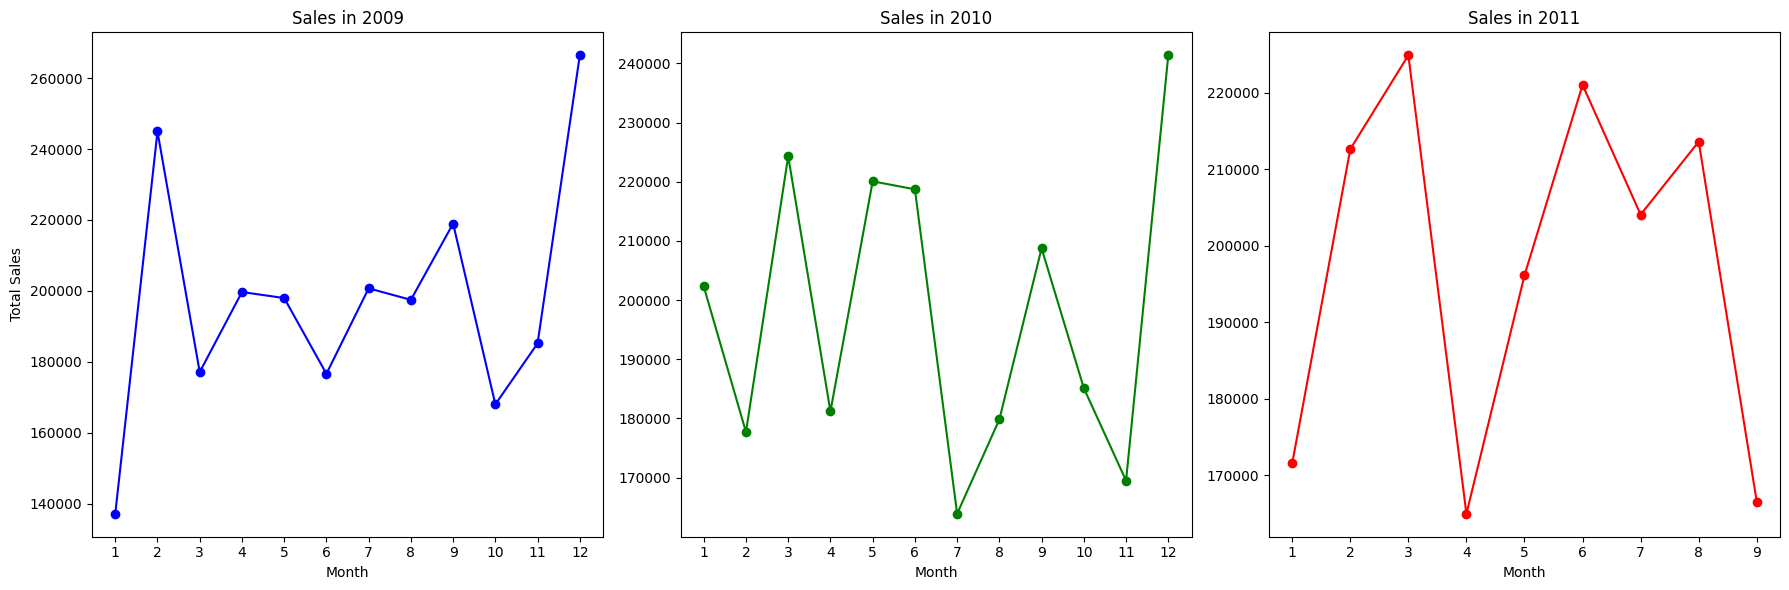

In [33]:
import matplotlib.pyplot as plt

# Assuming 'sales_2009', 'sales_2010', 'sales_2011' are dataframes with 'month' and 'total_sales'

fig, axs = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 columns of subplots

# Plot for 2009
axs[0].plot(sales_2009['month'], sales_2009['total_sales'], marker='o', color='b')
axs[0].set_title('Sales in 2009')
axs[0].set_xlabel('Month')
axs[0].set_ylabel('Total Sales')
axs[0].set_xticks(sales_2009['month'])  # Set x-ticks as the month values
axs[0].set_xticklabels([str(int(m)) for m in sales_2009['month']])  # Format as strings

# Plot for 2010
axs[1].plot(sales_2010['month'], sales_2010['total_sales'], marker='o', color='g')
axs[1].set_title('Sales in 2010')
axs[1].set_xlabel('Month')
axs[1].set_xticks(sales_2010['month'])
axs[1].set_xticklabels([str(int(m)) for m in sales_2010['month']])

# Plot for 2011
axs[2].plot(sales_2011['month'], sales_2011['total_sales'], marker='o', color='r')
axs[2].set_title('Sales in 2011')
axs[2].set_xlabel('Month')
axs[2].set_xticks(sales_2011['month'])
axs[2].set_xticklabels([str(int(m)) for m in sales_2011['month']])

# Adjust layout so titles/labels don't overlap
plt.tight_layout()

# Display the plot
plt.show()

## **Seasonal Fluctuations:**

- Each year shows significant fluctuations in sales across the months, indicating that sales are not consistent throughout the year.

**Peak and Trough Months:**

- 2009: Sales peak around the 1st and 11th months and drop significantly around the 3rd and 7th months.
- 2010: Sales are at their highest around the 11th month and lowest in the 1st and 6th months.
- 2011: The 1st and 4th months show high sales, while the 3rd and 8th months exhibit sharp declines.

**Year-over-Year Comparison:**
- Sales in 2009 start relatively high, drop in the middle, and end at a peak.
- 2010 has more volatile ups and downs compared to 2009, with a steep rise towards the end of the year.
- 2011 shows sharper drops and peaks, indicating high variability in sales performance.

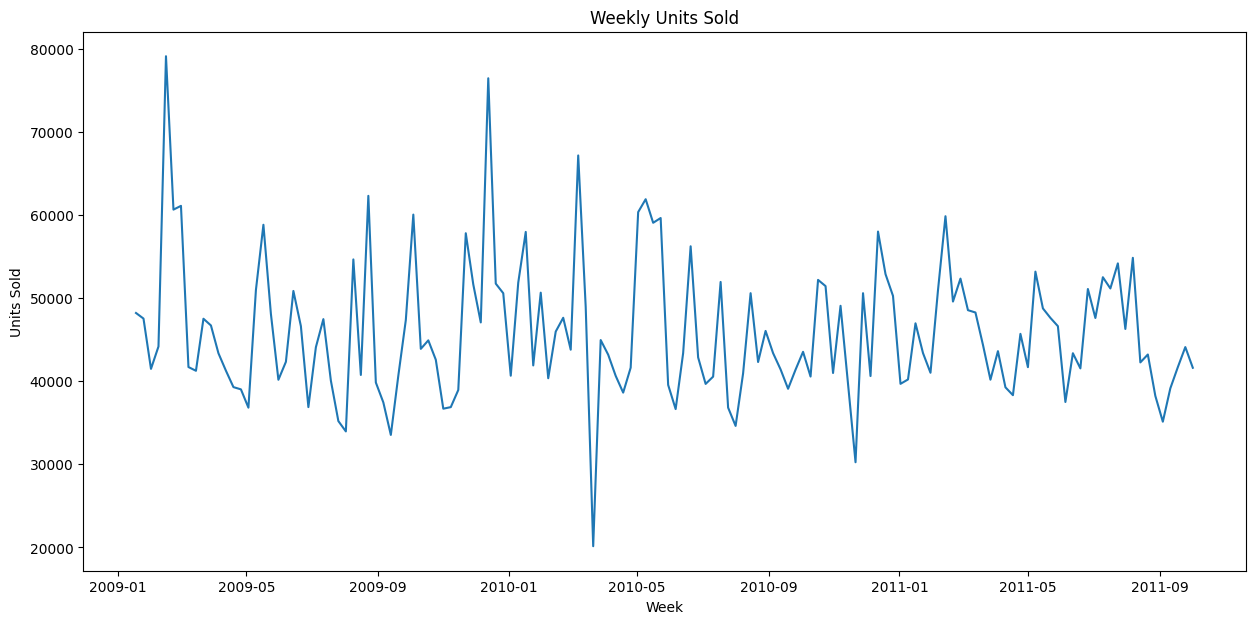

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure the index is in datetime format
df.index = pd.to_datetime(df.index)

# Convert 'UNITS' to numeric if necessary
df['UNITS'] = pd.to_numeric(df['UNITS'], errors='coerce')

# Resample by week and sum the units
weekly_data = df['UNITS'].resample('W').sum()

# Plot the resampled weekly data
plt.figure(figsize=(15, 7))
plt.plot(weekly_data.index, weekly_data)
plt.title('Weekly Units Sold')
plt.xlabel('Week')
plt.ylabel('Units Sold')
plt.show()

## Key Observations:

- High Initial Volatility: Early 2009 shows sharp peaks and troughs, with a maximum of nearly 80,000 units sold, followed by a rapid decline.

- Gradual Decline in Peaks: Peak sales decrease over time from 70,000 in 2009 to below 60,000 by 2011  indicating a slight reduction in demand.

- Significant Dips: Notable drops occur around mid-2010 and early 2011, reaching as low as 20,000 units, but these are temporary with quick recoveries.

- Stabilization Over Time: Sales patterns become more consistent by the end of 2011, showing fewer extreme fluctuations compared to earlier periods

Overall: The data shows high volatility in early 2009, a gradual decline in peak sales, and stabilization by 2011, suggesting a maturing market.

In [36]:

week_growth_query= '''
SELECT
    WEEK_END_DATE,
    SUM(UNITS) AS total_sales,
    LAG(SUM(UNITS), 1) OVER (ORDER BY WEEK_END_DATE) AS previous_week_sales,
    (SUM(UNITS) - LAG(SUM(UNITS), 1) OVER (ORDER BY WEEK_END_DATE)) / LAG(SUM(UNITS), 1) OVER (ORDER BY WEEK_END_DATE) * 100 AS week_over_week_growth
FROM df
GROUP BY WEEK_END_DATE
ORDER BY WEEK_END_DATE;
'''
week_growth=duckdb.query(week_growth_query).df()

In [37]:

week_growth

,WEEK_END_DATE,total_sales,previous_week_sales,week_over_week_growth
0,2009-01-14,48194.0,NaN,NaN
1,2009-01-21,47523.0,48194.0,-1.392289
2,2009-01-28,41473.0,47523.0,-12.730678
3,2009-02-04,44164.0,41473.0,6.488559
4,2009-02-11,79075.0,44164.0,79.048546
...,...,...,...,...
137,2011-08-31,35120.0,38221.0,-8.113341
138,2011-09-07,39128.0,35120.0,11.412301
139,2011-09-14,41677.0,39128.0,6.514516
140,2011-09-21,44093.0,41677.0,5.796962


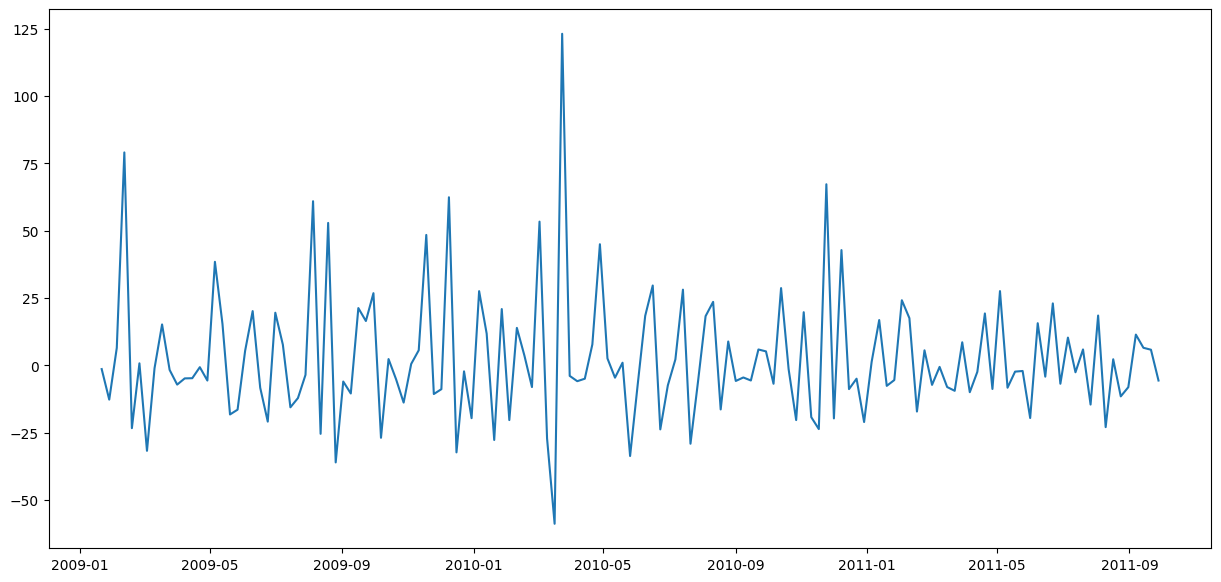

In [39]:

plt.figure(figsize=(15,7))
plt.plot(week_growth.WEEK_END_DATE, week_growth['week_over_week_growth'])

- High Early Volatility: Sharp fluctuations in 2009, with growth reaching up to +79.5%.
- Negative Growth: Periodic dips like -12.7% in early 2009 and -8.1% in 2011.
- Stabilization: By 2011, week-over-week changes are moderate, indicating more stable performance.

## Hypothesis testing


### **Sales at the Product Level**

1. **Discount Effect**: Products offered at a discount are more likely to achieve higher sales compared to non-discounted products.

In [41]:

# Create a new column 'discount' where:
# 1 indicates a discount (price < base_price)
# 0 indicates no discount (price >= base_price)
df['discount'] = np.where(df['PRICE'] < df['BASE_PRICE'], 1, 0)

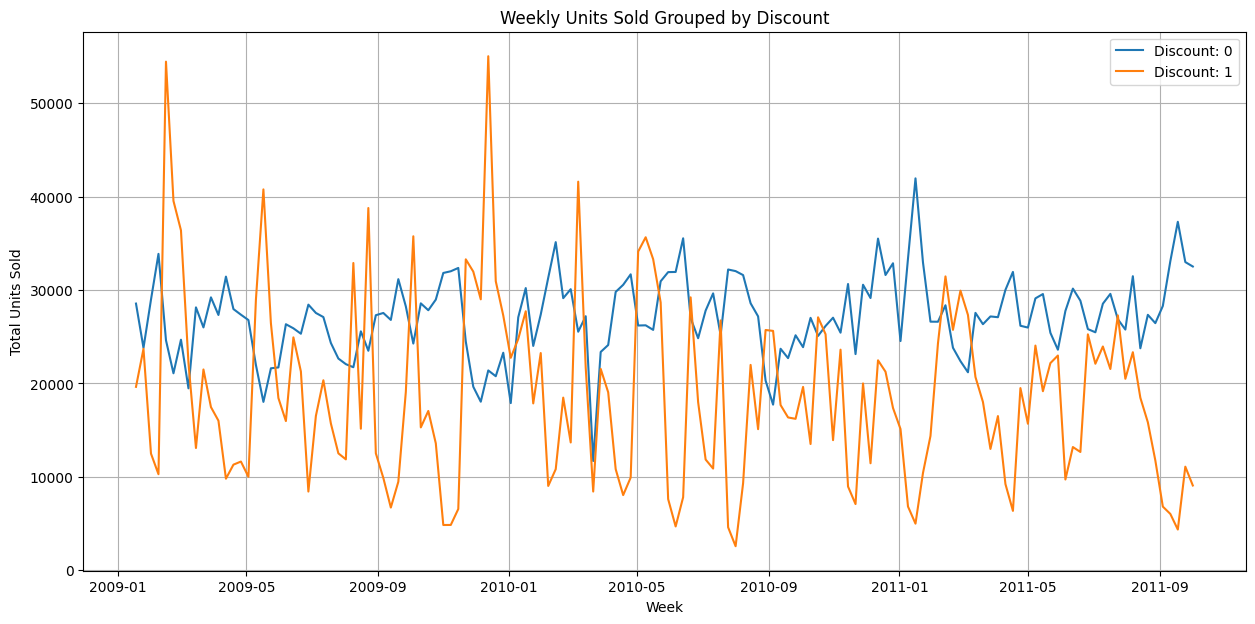

In [42]:
# Group by week and discount, then sum the 'UNITS'
weekly_discount_data = df.groupby([pd.Grouper(freq='W'), 'discount'])['UNITS'].sum().reset_index()

# Rename the 'index' column to a more appropriate name (like 'Week')
weekly_discount_data.rename(columns={'index': 'WEEK_END_DATE'}, inplace=True)

# Create a pivot table to make the plotting easier
pivot_table = weekly_discount_data.pivot(index='WEEK_END_DATE', columns='discount', values='UNITS')

# Plot the weekly data for each discount level
plt.figure(figsize=(15, 7))
for discount in pivot_table.columns:
    plt.plot(pivot_table.index, pivot_table[discount], label=f'Discount: {discount}')

plt.title('Weekly Units Sold Grouped by Discount')
plt.xlabel('Week')
plt.ylabel('Total Units Sold')
plt.legend()
plt.grid(True)
plt.show()

- **The hypothesis is partially supported**. Products on discount are more likely to sell in the short term, but the effect is not sustained, indicating that while discounts boost immediate sales, their long-term impact is limited compared to stable non-discounted sales.

In [44]:
product_category= '''
select CATEGORY, sum(UNITS) as product from df group by CATEGORY order by product desc

'''
grouped_category=duckdb.query(product_category).df()

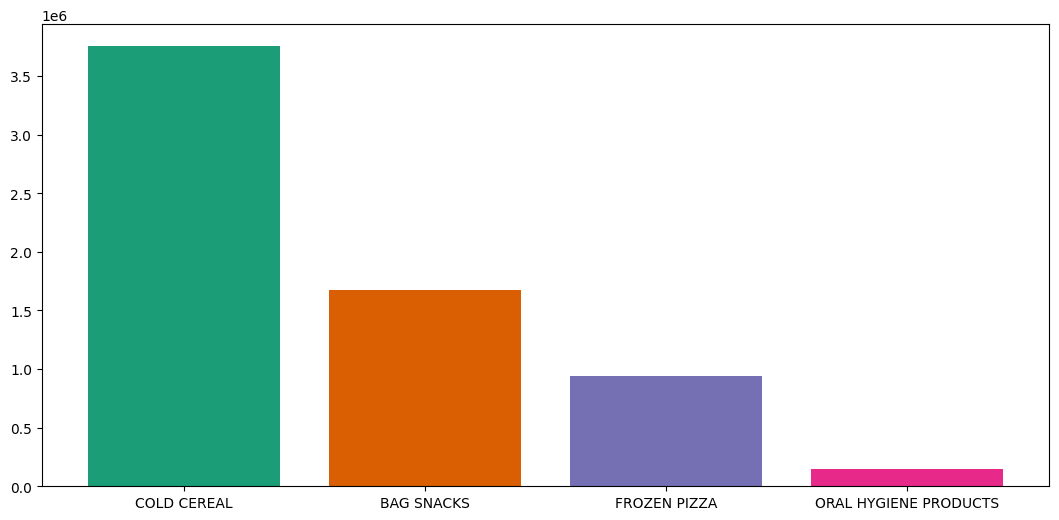

In [45]:

#grouped_category visulazation
plt.figure(figsize=(13,6))
plt.bar(grouped_category['CATEGORY'],grouped_category['product'], color=sns.palettes.mpl_palette('Dark2') )
plt.show()

- Cold Cereal has the highest sales volume, making it the top-selling category by a significant margin.

- Bag Snacks have less than half the sales of Cold Cereal but still outperform other categories significantly.

- Frozen Pizza and Oral Hygiene Products have much lower sales, with Frozen Pizza.


3. **Sub-Category Impact**: Sales trends are likely to differ significantly across various product sub-categories.

In [46]:

#group products based on the sub categories
product_subcategory= '''
select SUB_CATEGORY, sum(UNITS) as product from df group by SUB_CATEGORY order by product desc

'''
grouped_sub_category=duckdb.query(product_subcategory).df()

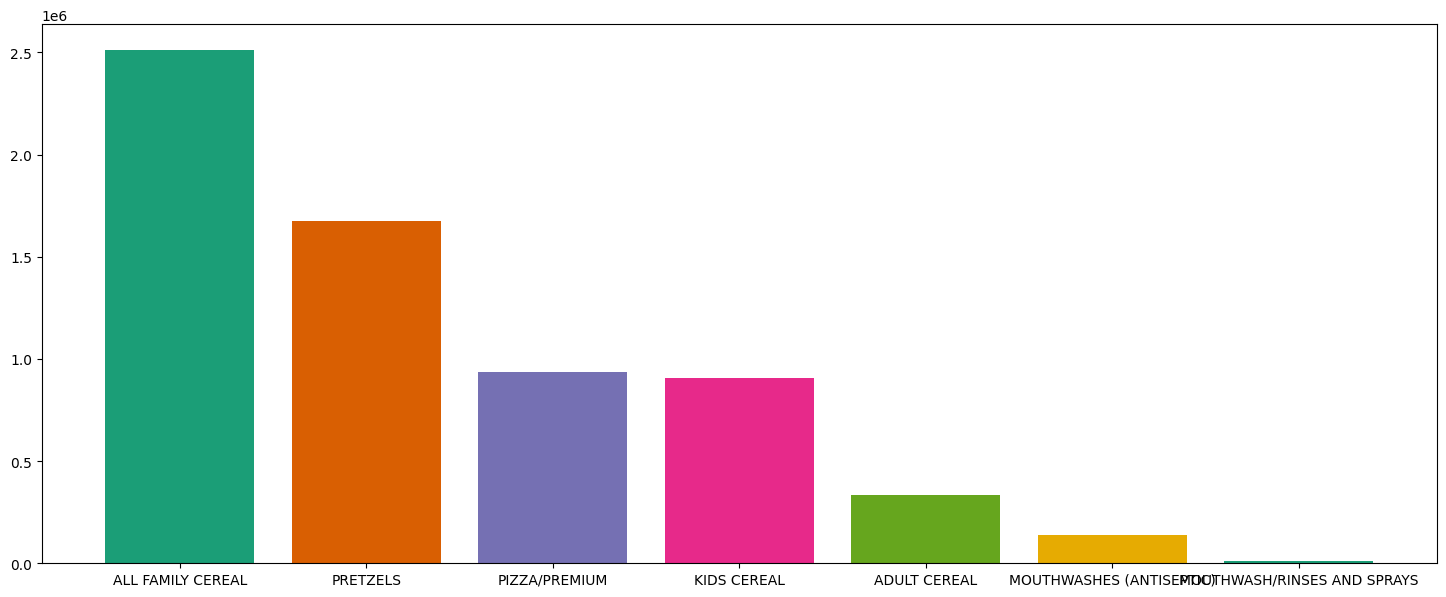

In [47]:

#grouped_sub_category visulazation
plt.figure(figsize=(18,7))
plt.bar(grouped_sub_category['SUB_CATEGORY'],grouped_sub_category['product'], color=sns.palettes.mpl_palette('Dark2') )
plt.show()

All Family Cereal dominates sales, followed by Pretzels. Premium Pizza and Kids Cereal have mid-level sales, while Adult Cereal and Mouthwashes have limited demand. Mouthwash Rinses and Sprays have the lowest sales, indicating a niche market.

4.**Product Size**: Larger products are expected to sell more compared to smaller ones.

In [48]:
#before we group by product size we will convert the size to the same scale (OZ)
# Function to convert all sizes to OZ
def convert_to_oz(size):
    if 'OZ' in size:
        return float(size.replace(' OZ', ''))
    elif 'ML' in size:
        ml_value = float(size.replace(' ML', ''))
        return ml_value * 0.033814  # Convert ML to OZ
    elif 'LT' in size:
        lt_value = float(size.replace(' LT', ''))
        return lt_value * 33.814  # Convert LT to OZ
    else:
        return None  # Handle any unexpected cases

# Apply the conversion function to the 'size' column
df['PRODUCT_SIZE'] = df['PRODUCT_SIZE'].apply(convert_to_oz)

# Group by product size and sum the units
size_sales = df.groupby('PRODUCT_SIZE')['UNITS'].sum().reset_index()

# Sort by sales in descending order
size_sales = size_sales.sort_values(by='UNITS', ascending=False)

In [49]:

grouped_size = pd.DataFrame(df)

# Group by size_in_oz and count the number of items for each size
grouped_df = grouped_size.groupby('PRODUCT_SIZE').size().reset_index(name='product_count')

# Sort by the item count in descending order
sorted_df = grouped_df.sort_values(by='product_count', ascending=False)

# Display the sorted DataFrame
sorted_df

,PRODUCT_SIZE,product_count
4,15.000,39706
7,18.000,32203
5,16.000,21443
3,12.250,21426
14,32.700,18743
8,20.000,10789
1,12.000,10786
10,28.300,10767
2,12.200,10766
11,29.600,9989


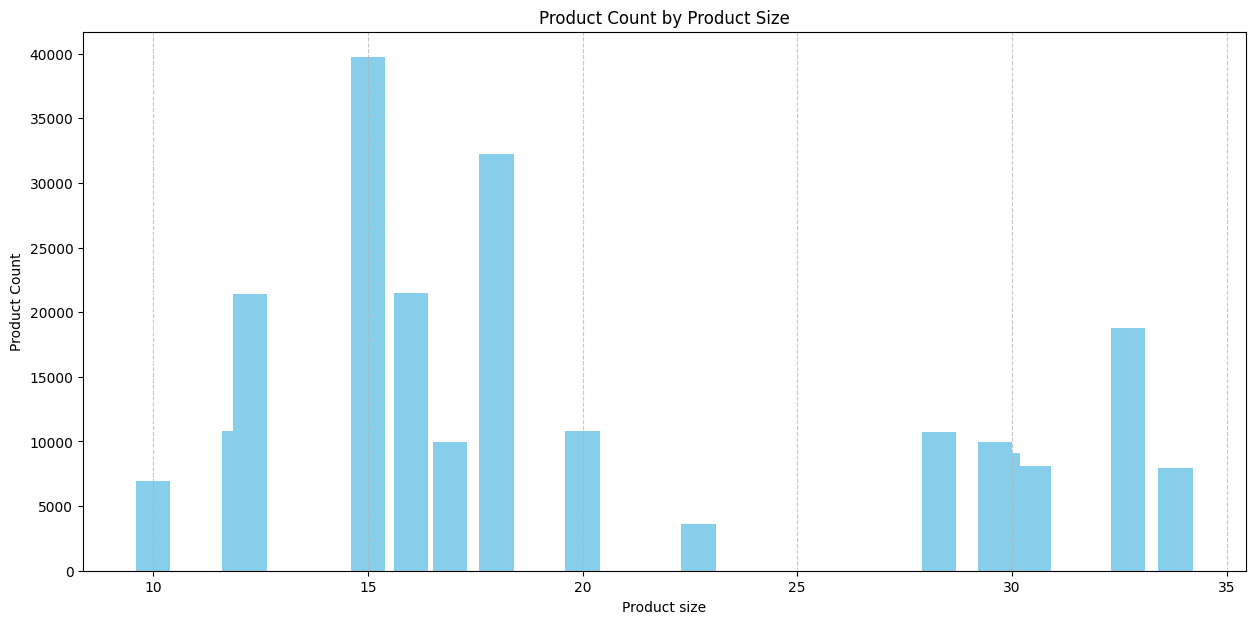

In [50]:

# Plot a horizontal bar chart for better readability
plt.figure(figsize=(15, 7))
plt.bar(sorted_df['PRODUCT_SIZE'], sorted_df['product_count'], color='skyblue')

# Add labels and title
plt.xlabel('Product size')
plt.ylabel('Product Count')
plt.title('Product Count by Product Size')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

The distribution is concentrated around Sizes 15 and 20, with fewer products in the ranges between 20 to 30 and at Size 35. This suggests that mid-sized products are the most popular, while very small or large sizes are less common.

5. **Display vs. Featured products**: Products that are displayed are expected to have higher sales than those simply featured.

In [53]:
#groub by Display vs. Featured prodducts
grouped_presentation='''
select FEATURE,DISPLAY, sum(UNITS) as Sales
from df
 group by FEATURE,DISPLAY
 order by Sales desc
'''
grouped_presentation = duckdb.query(grouped_presentation).df()

In [54]:
grouped_presentation


,FEATURE,DISPLAY,Sales
0,0,0,4267070.0
1,1,1,950837.0
2,0,1,851240.0
3,1,0,449645.0


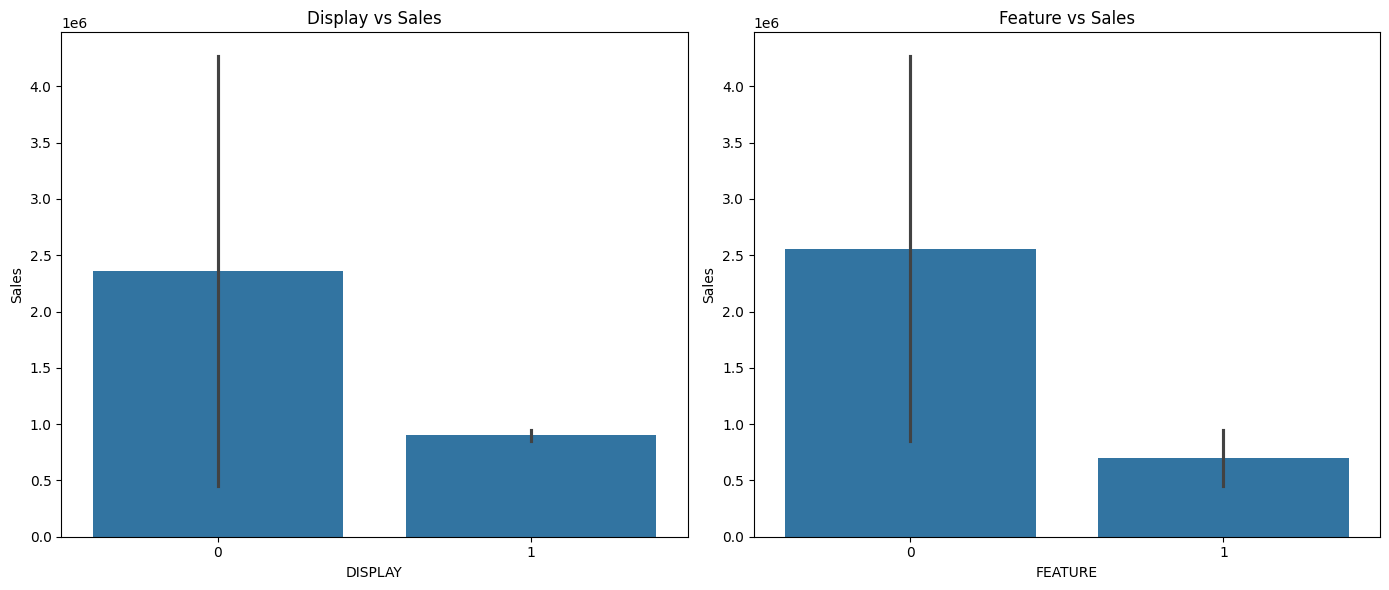

In [55]:
# Set up the figure and subplots
plt.figure(figsize=(14, 6))  # One figure, bigger width to fit plots

# First subplot: Display vs Sales
plt.subplot(1, 2, 1)  # 1 row, 2 columns, position 1
sns.barplot(x=grouped_presentation['DISPLAY'], y=grouped_presentation['Sales'])
plt.title('Display vs Sales')

# Second subplot: Feature vs Sales
plt.subplot(1, 2, 2)  # 1 row, 2 columns, position 2
sns.barplot(x=grouped_presentation['FEATURE'], y=grouped_presentation['Sales'])
plt.title('Feature vs Sales')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

Contrary to expectations, products with displays or features perform worse in terms of sales. This suggests that display or feature strategies may not be effective for this product group and could indicate a need for strategy revision.

6.**Manufacturer**: Well-known brands or manufacturers are expected to have higher sales.

In [62]:
# Group products by manufacturer
grouped_manufacturers = '''
select MANUFACTURER, sum(UNITS) as Sales
from df
group by MANUFACTURER
order by Sales desc
'''
grouped_manufacturers = duckdb.query(grouped_manufacturers).df()

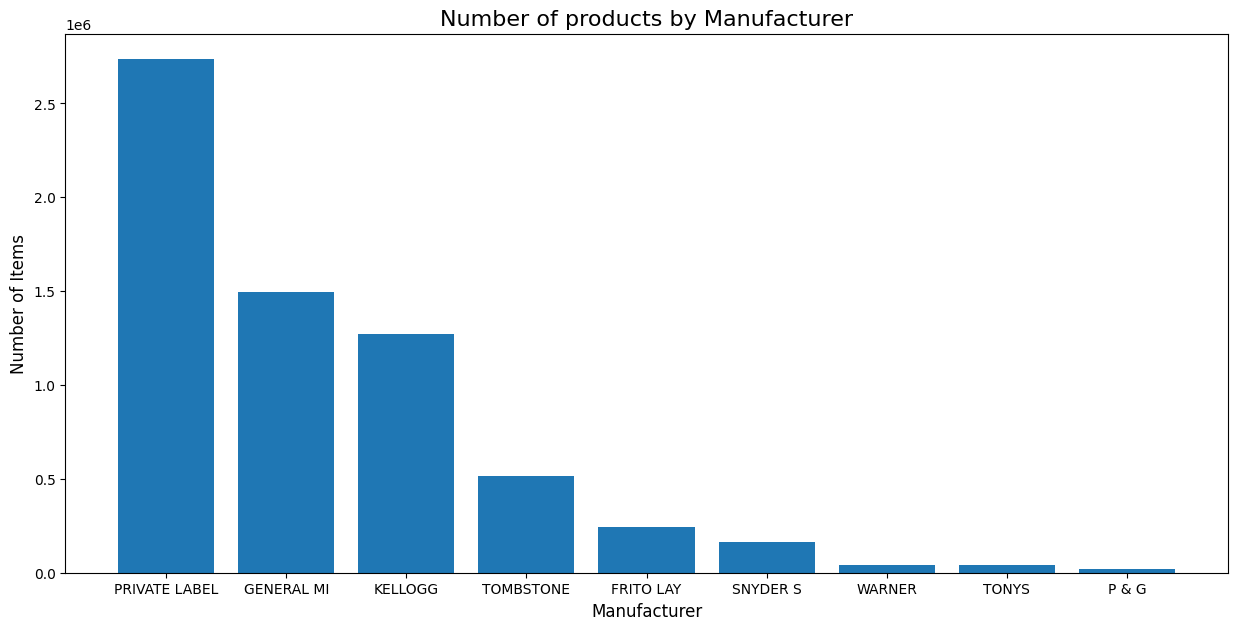

In [65]:

# Plot a bar chart using matplotlib
plt.figure(figsize=(15, 7))
plt.bar(grouped_manufacturers['MANUFACTURER'], grouped_manufacturers['Sales'])

# Add titles and labels
plt.title('Number of products by Manufacturer', fontsize=16)
plt.xlabel('Manufacturer', fontsize=12)
plt.ylabel('Number of Items', fontsize=12)
plt.show()

-The market is dominated by Private Label, with General Mills and Kellogg being the main branded competitors. Smaller players like Frito Lay and Tombstone have a presence, but niche brands hold a minor share in terms of product count.

## Sales at the Store Level

1. **Store Performance across diffrent stores**: Sales patterns are likely to vary widely across different store locations.

In [66]:
# What store is driving the highest sales?
stores_sales = '''
select STORE_NAME, sum(UNITS) as Sales
from df
group by STORE_NAME
order by Sales desc
'''
stores_sales = duckdb.query(stores_sales).df()

In [67]:
stores_sales

,STORE_NAME,Sales
0,HOUSTON,287156.0
1,ANDERSON TOWNE CTR,229575.0
2,MIDDLETOWN,217013.0
3,CINCINNATI,213418.0
4,HYDE PARK,181721.0
...,...,...
67,LANDMARK PLACE S/C,36753.0
68,NORWOOD,34706.0
69,NORTHBOROUGH SQ,32779.0
70,WALNUT HILLS/PEEBLES,21913.0


**Top-Performing Stores**:

- Houston has the highest sales with 287,156 units, followed by Anderson Towne CTR at 229,575 units.

8 Middletown and Cincinnati are also high-performing stores, each exceeding 200,000 units in sales.

**Mid-Level Stores**:

- Stores like Hyde Park and others show sales ranging between 150,000 to 180,000 units, indicating moderate performance.

**Low-Performing Stores**:

- Stores such as Landmark Place S/C, Norwood, and Northborough SQ have significantly lower sales, ranging between 30,000 to 35,000 units.

- Over-the-Rhine has the lowest sales, with only 18,727 units, indicating poor performance.

Overall: The top-performing stores are concentrated in Houston and Anderson Towne CTR, while several stores, especially Over-the-Rhine, show very low sales, highlighting potential underperformance or a need for strategic changes.

2. **City-Based Sales Variation**: Sales trends are expected to differ considerably across various cities.

In [68]:
# Analyze sales by city
city_sales = '''
select ADDRESS_CITY_NAME as City, sum(UNITS) as Sales
from df
group by City
order by Sales desc
'''
city_sales = duckdb.query(city_sales).df()

# Display results
city_sales


,City,Sales
0,CINCINNATI,1063918.0
1,HOUSTON,508698.0
2,MIDDLETOWN,369709.0
3,HAMILTON,195893.0
4,MAINEVILLE,187881.0
5,DAYTON,180414.0
6,COVINGTON,178045.0
7,LEBANON,169744.0
8,BLUE ASH,162784.0
9,LOVELAND,161995.0


Cincinnati dominates sales, with Houston and Middletown trailing behind. Most other cities exhibit moderate to low sales, suggesting opportunities for targeted strategies to boost sales in lower-performing regions.

3. **Store Size**: Larger stores are likely to have higher sales due to greater foot traffic and inventory.

In [69]:
# Analyze sales by store size
store_size = '''
select SALES_AREA_SIZE_NUM as size, sum(UNITS) as Sales
from df
group by size
order by size desc
'''
store_size = duckdb.query(store_size).df()

# Display results
store_size


,size,Sales
0,86517,169744.0
1,85876,128037.0
2,85710,152696.0
3,81958,229575.0
4,77730,181721.0
...,...,...
67,29231,34706.0
68,25072,32779.0
69,24721,43310.0
70,22920,21913.0


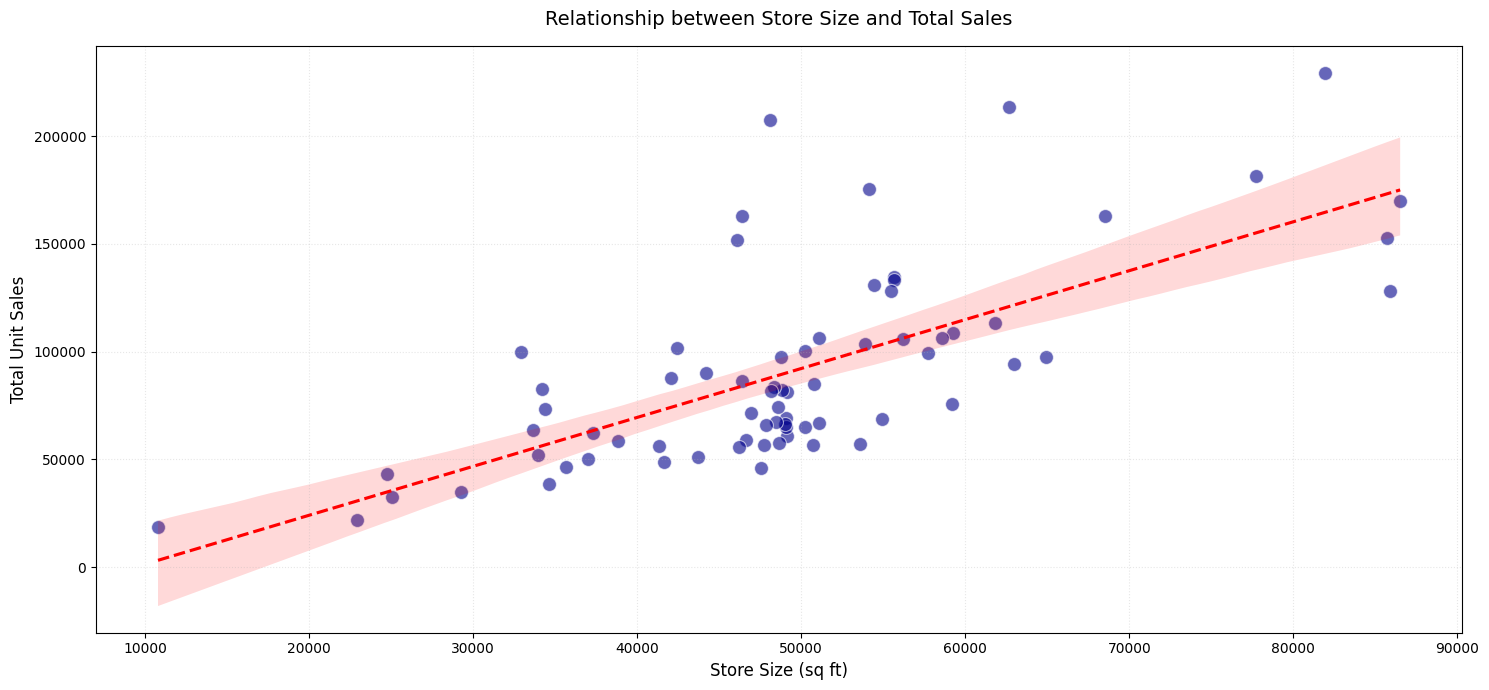

In [70]:
# Create scatter plot of store size vs sales with different styling
plt.figure(figsize=(15,7))
sns.scatterplot(data=store_size, x='size', y='Sales', 
                alpha=0.6, # Add transparency
                color='darkblue', # Change color
                s=100) # Increase point size

# Add trend line
sns.regplot(data=store_size, x='size', y='Sales',
            scatter=False, # Don't plot points again
            color='red', # Red trend line
            line_kws={'linestyle':'--'}) # Dashed line style

# Customize plot
plt.title('Relationship between Store Size and Total Sales', 
          fontsize=14, pad=15)
plt.xlabel('Store Size (sq ft)', fontsize=12)
plt.ylabel('Total Unit Sales', fontsize=12)

# Add grid
plt.grid(True, linestyle=':', alpha=0.3)

plt.tight_layout()
plt.show()


Analysis of Store Size vs Sales:
- There is a moderate positive correlation between store size and total unit sales
- Larger stores (>70,000 sq ft) tend to have higher sales volumes, likely due to greater inventory capacity and foot traffic
- However, there is significant variation, with some smaller stores achieving comparable sales to larger ones
- The relationship appears roughly linear but with increasing variance at larger store sizes
- A few outlier stores show very high sales relative to their size, suggesting other factors (like location or management) play important roles
- The trend line indicates that each additional square foot correlates with marginally higher unit sales, though with diminishing returns


There is a general positive correlation between store size and sales. Larger stores tend to have higher sales, though the relationship is not perfectly linear

4.**Weekly Baskets Hypothesis**: Stores with higher average weekly baskets sold are expected to have higher overall sales.

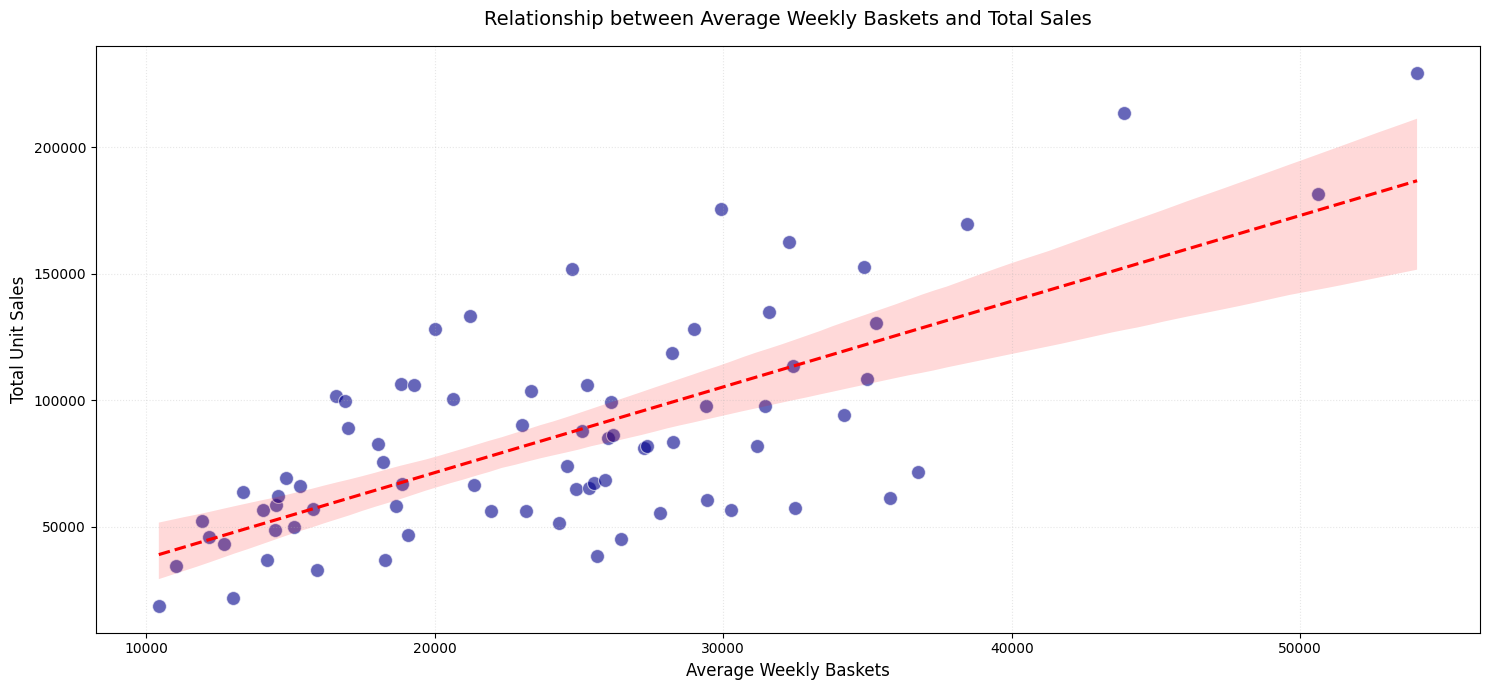

In [71]:
# Create dataframe of weekly baskets vs sales
store_basket = df.groupby('AVG_WEEKLY_BASKETS')['UNITS'].sum().reset_index()
store_basket.columns = ['basket', 'Sales']

# Create scatter plot
plt.figure(figsize=(15,7))
sns.scatterplot(data=store_basket, x='basket', y='Sales',
                alpha=0.6,
                color='darkblue', 
                s=100)

# Add trend line
sns.regplot(data=store_basket, x='basket', y='Sales',
            scatter=False,
            color='red',
            line_kws={'linestyle':'--'})

# Customize plot
plt.title('Relationship between Average Weekly Baskets and Total Sales',
          fontsize=14, pad=15)
plt.xlabel('Average Weekly Baskets', fontsize=12)
plt.ylabel('Total Unit Sales', fontsize=12)

# Add grid
plt.grid(True, linestyle=':', alpha=0.3)

plt.tight_layout()
plt.show()


# Key observations from the plot:
- Strong positive correlation between average weekly baskets and total unit sales
- The relationship appears to be roughly linear, with stores handling more weekly baskets consistently showing higher total sales
- Some notable outliers exist, particularly stores with around 35,000-40,000 weekly baskets showing exceptionally high sales
- The trend line shows a clear upward slope, suggesting that each additional weekly basket correlates with increased total unit sales
- The spread of points around the trend line increases at higher basket counts, indicating more variability in sales performance among larger volume stores


# Conclusion

## Time Series Analysis
- January consistently has the highest sales each year
- September tends to have the lowest sales
- Clear weekly seasonality but no long-term trend, except during promotional periods (e.g. early 2010)
- Monthly sales show seasonal patterns - peaks in winter, troughs in late summer/early fall
- Despite weekly fluctuations, sales trend remains stable overall with notable spike around week 60

## Product-Level Analysis
- Cold cereal generates highest sales, frozen pizza has lower sales
- All Family Cereal dominates across sub-categories
- Medium-sized products most popular, larger sizes don't show significantly higher demand
- Products without display/feature have higher sales vs those with display/feature
- Discounts create temporary sales spikes but don't sustain higher overall sales
- Private Label outperforms major brands, showing popular manufacturers don't necessarily drive highest sales

## Store-Level Analysis
- HOUSTON leads individual store sales
- CINCINNATI has highest city-wide sales
- Larger stores drive higher sales due to increased foot traffic and inventory
- Higher average weekly baskets correlate with higher overall sales



In [73]:
print("\n")
print("="*80)
print("\n")
print("""
███████╗██████╗  █████╗     ██╗███████╗    ██████╗  ██████╗ ███╗   ██╗███████╗██╗
██╔════╝██╔══██╗██╔══██╗    ██║██╔════╝    ██╔══██╗██╔═══██╗████╗  ██║██╔════╝██║
█████╗  ██║  ██║███████║    ██║███████╗    ██║  ██║██║   ██║██╔██╗ ██║█████╗  ██║
██╔══╝  ██║  ██║██╔══██║    ██║╚════██║    ██║  ██║██║   ██║██║╚██╗██║██╔══╝  ╚═╝
███████╗██████╔╝██║  ██║    ██║███████║    ██████╔╝╚██████╔╝██║ ╚████║███████╗██╗
╚══════╝╚═════╝ ╚═╝  ╚═╝    ╚═╝╚══════╝    ╚═════╝  ╚═════╝ ╚═╝  ╚═══╝╚══════╝╚═╝
""")
print("\n")
print("="*80)
print("\n")








███████╗██████╗  █████╗     ██╗███████╗    ██████╗  ██████╗ ███╗   ██╗███████╗██╗
██╔════╝██╔══██╗██╔══██╗    ██║██╔════╝    ██╔══██╗██╔═══██╗████╗  ██║██╔════╝██║
█████╗  ██║  ██║███████║    ██║███████╗    ██║  ██║██║   ██║██╔██╗ ██║█████╗  ██║
██╔══╝  ██║  ██║██╔══██║    ██║╚════██║    ██║  ██║██║   ██║██║╚██╗██║██╔══╝  ╚═╝
███████╗██████╔╝██║  ██║    ██║███████║    ██████╔╝╚██████╔╝██║ ╚████║███████╗██╗
╚══════╝╚═════╝ ╚═╝  ╚═╝    ╚═╝╚══════╝    ╚═════╝  ╚═════╝ ╚═╝  ╚═══╝╚══════╝╚═╝





